In [24]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/drive/MyDrive/mental_health_workplace_survey.csv")

# Preview columns
print("Columns in dataset:\n", df.columns.tolist())
print("\nDataset shape:", df.shape)
df.head()


Columns in dataset:
 ['EmployeeID', 'Age', 'Gender', 'Country', 'JobRole', 'Department', 'YearsAtCompany', 'WorkHoursPerWeek', 'RemoteWork', 'BurnoutLevel', 'JobSatisfaction', 'StressLevel', 'ProductivityScore', 'SleepHours', 'PhysicalActivityHrs', 'CommuteTime', 'HasMentalHealthSupport', 'ManagerSupportScore', 'HasTherapyAccess', 'MentalHealthDaysOff', 'SalaryRange', 'WorkLifeBalanceScore', 'TeamSize', 'CareerGrowthScore', 'BurnoutRisk']

Dataset shape: (3000, 25)


,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [25]:
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill numeric columns with median
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# Confirm all missing values handled
print("\nMissing values after filling:")
print(df.isnull().sum())



Missing values per column:
EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
RemoteWork                0
BurnoutLevel              0
JobSatisfaction           0
StressLevel               0
ProductivityScore         0
SleepHours                0
PhysicalActivityHrs       0
CommuteTime               0
HasMentalHealthSupport    0
ManagerSupportScore       0
HasTherapyAccess          0
MentalHealthDaysOff       0
SalaryRange               0
WorkLifeBalanceScore      0
TeamSize                  0
CareerGrowthScore         0
BurnoutRisk               0
dtype: int64

Missing values after filling:
EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
Remo

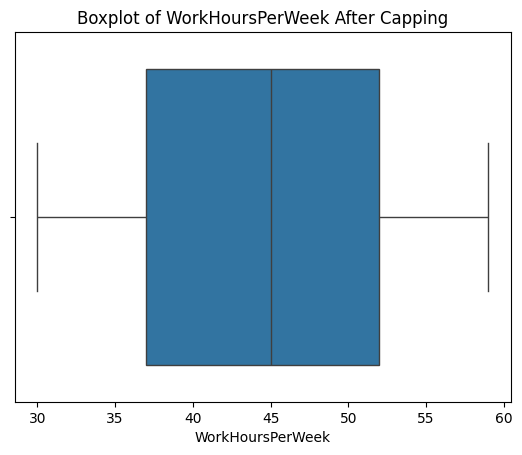

In [26]:
# Cap WorkHoursPerWeek at 126 (i.e. 18 hrs/day × 7)
df.loc[df['WorkHoursPerWeek'] > 126, 'WorkHoursPerWeek'] = 126

# Plot to confirm
sns.boxplot(x=df['WorkHoursPerWeek'])
plt.title("Boxplot of WorkHoursPerWeek After Capping")
plt.show()


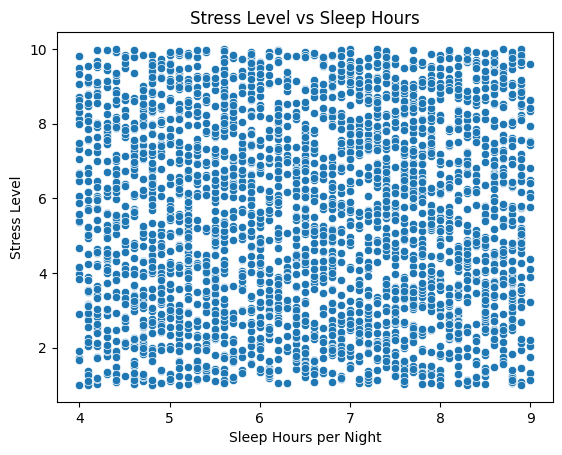

In [27]:
sns.scatterplot(data=df, x='SleepHours', y='StressLevel')
plt.title("Stress Level vs Sleep Hours")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Stress Level")
plt.show()


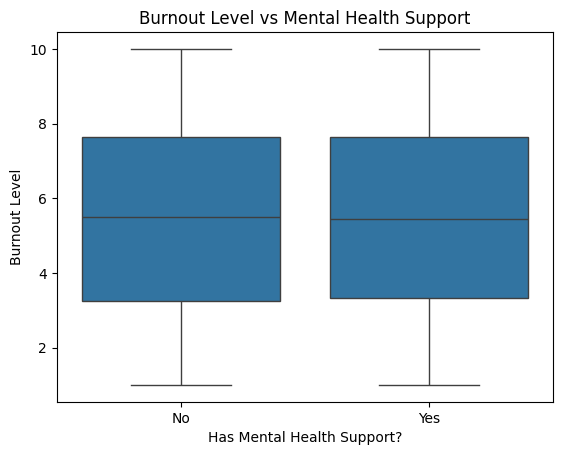

In [28]:
sns.boxplot(data=df, x='HasMentalHealthSupport', y='BurnoutLevel')
plt.title("Burnout Level vs Mental Health Support")
plt.xlabel("Has Mental Health Support?")
plt.ylabel("Burnout Level")
plt.show()


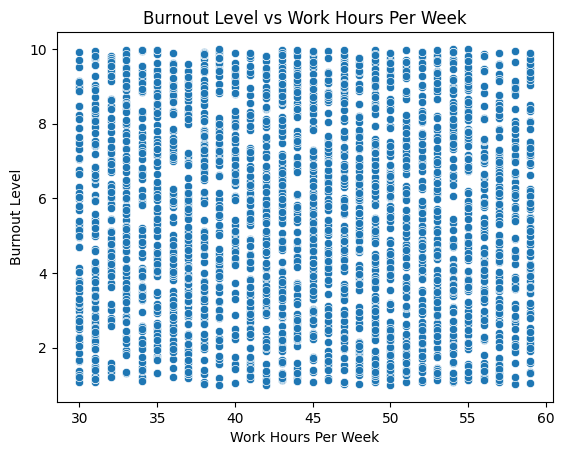

In [29]:
sns.scatterplot(data=df, x='WorkHoursPerWeek', y='BurnoutLevel')
plt.title("Burnout Level vs Work Hours Per Week")
plt.xlabel("Work Hours Per Week")
plt.ylabel("Burnout Level")
plt.show()


In [30]:
df.to_csv("Mental_Health_Burnout_CLEAN.csv", index=False)
print("Cleaned dataset saved as Mental_Health_Burnout_CLEAN.csv")


Cleaned dataset saved as Mental_Health_Burnout_CLEAN.csv
